In [13]:
import numpy as np
import pandas as pd

import matplotlib.pylab as plt

from IPython.display import Image

# 부트스트랩과 신뢰구간

### Bootstrap 이란?

###### 정의

###### 목적

###### 알고리즘 (How to Use)

###### 예시

In [3]:
'''
Q.

1. bootstraped data는 표본으로 부터 복원추출한건데, bootstraped data로부터 얻은 표본통계량들의 분포가 모집단을 잘 설명할 수 있나? 
   다시말해, 표본으로부터 얻은 재표본들이, 표본과 모집단을 모두 대표할 수 있는가?
   raw 표본이 제대로 잘 설계된 표본이라는 가정 하에 수행되는것인가?
'''

'\nQ.\n\n1. bootstraped data는 표본으로 부터 복원추출한건데, bootstraped data로부터 얻은 표본통계량들의 분포가 모집단을 잘 설명할 수 있나? \n   다시말해, 표본으로부터 얻은 재표본들이, 표본과 모집단을 모두 대표할 수 있는가?\n   raw 표본이 제대로 잘 설계된 표본이라는 가정 하에 수행되는것인가?\n'

In [ ]:
# 시험해보기

In [5]:
data = pd.read_csv('C:/data/train.csv') ;data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [6]:
# 위 데이터가 모집단이라고 생각하고, 주택가격의 평균을 추정하는 bootstrapping을 해보자

# 1. raw 표본 설정 - 표본 크기는 100
# 2. raw 표본에서 복원추출하여 재표본 추출
# 3. 재표본집단의 통계량(평균) 측정 및 기록
# 4. 2~3 반복
# 5. 반복을 통해 수집한 통계량의 분포 살펴보기(히스토그램 등)

In [56]:
# 1. raw 표본 설정
raw_sample = data.sample(100); raw_sample

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
591,592,60,RL,97.0,13478,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,ConLI,Normal,451950
549,550,60,FV,75.0,9375,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2009,WD,Normal,263000
1176,1177,20,RL,37.0,6951,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,10,2008,WD,Normal,119500
1039,1040,180,RM,21.0,1477,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,80000
837,838,160,RM,21.0,1680,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2008,WD,Normal,100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453,454,60,FV,75.0,9000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,210000
573,574,80,RL,76.0,9967,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2007,WD,Normal,170000
1354,1355,60,RL,NaN,10316,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,235000
557,558,50,C (all),60.0,11040,Pave,NaN,Reg,Low,AllPub,...,0,NaN,NaN,NaN,0,9,2006,COD,Normal,108000


In [10]:
def bootstrap(sample_size, num_of_resample):
    # 재표본추출된 표본집단의 통계량(평균)을 저장할 list
    statistics = [] 
    
    for i in range(0, num_of_resample):
        # 표본으로부터 크기가 sample_size인 resample 추출하여 통계량(mean) 계산
        resample_mean = raw_sample.sample(sample_size, replace=True)['SalePrice'].mean() 
        statistics.append(resample_mean)
    
    return statistics

In [61]:
resample_means = bootstrap(100, 300)

(array([ 4.,  6., 35., 50., 74., 57., 48., 14.,  9.,  3.]),
 array([149898.04 , 154453.666, 159009.292, 163564.918, 168120.544,
        172676.17 , 177231.796, 181787.422, 186343.048, 190898.674,
        195454.3  ]),
 <BarContainer object of 10 artists>)

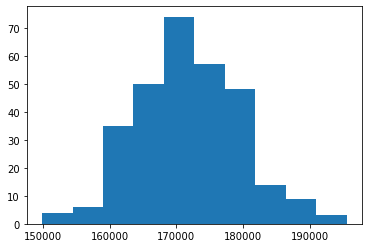

In [62]:
plt.hist(resample_means)

In [63]:
print(data['SalePrice'].mean())
print(raw_sample['SalePrice'].mean())

180921.19589041095
172831.02


In [64]:
np.mean(resample_means)

171843.1157

In [40]:
def bootstrap_median(sample_size, num_of_resample):
    # 재표본추출된 표본집단의 통계량(평균)을 저장할 list
    statistics = [] 
    
    for i in range(0, num_of_resample):
        # 표본으로부터 크기가 sample_size인 resample 추출하여 통계량(mean) 계산
        median = raw_sample.sample(sample_size, replace=True)['SalePrice'].median() 
        statistics.append(median)
    
    return statistics

In [65]:
resample_medians = bootstrap_median(100, 100) ;resample_medians

[159500.0,
 161450.0,
 143500.0,
 149500.0,
 146625.0,
 162500.0,
 146875.0,
 149300.0,
 161450.0,
 160000.0,
 165000.0,
 159500.0,
 151000.0,
 179900.0,
 154118.5,
 165070.0,
 137000.0,
 154168.5,
 148000.0,
 148650.0,
 150918.5,
 154118.5,
 161450.0,
 159000.0,
 148250.0,
 154950.0,
 154900.0,
 145125.0,
 148000.0,
 150668.5,
 158950.0,
 146875.0,
 148250.0,
 161450.0,
 148000.0,
 157000.0,
 160000.0,
 161450.0,
 148500.0,
 153337.0,
 149300.0,
 148500.0,
 163950.0,
 154900.0,
 148900.0,
 154950.0,
 148900.0,
 145125.0,
 160000.0,
 147275.0,
 152168.5,
 154950.0,
 149300.0,
 141250.0,
 165070.0,
 150150.0,
 162900.0,
 163620.0,
 165070.0,
 151000.0,
 143000.0,
 146625.0,
 157450.0,
 160000.0,
 154950.0,
 179950.0,
 154900.0,
 160000.0,
 157500.0,
 143750.0,
 181000.0,
 150150.0,
 157500.0,
 159500.0,
 148000.0,
 153337.0,
 149500.0,
 145250.0,
 163950.0,
 159500.0,
 156168.5,
 143750.0,
 148500.0,
 152168.5,
 174950.0,
 152168.5,
 179950.0,
 166120.0,
 144875.0,
 156950.0,
 152168.5,

(array([ 2.,  9., 27., 15., 14., 19.,  9.,  0.,  1.,  4.]),
 array([137000., 141400., 145800., 150200., 154600., 159000., 163400.,
        167800., 172200., 176600., 181000.]),
 <BarContainer object of 10 artists>)

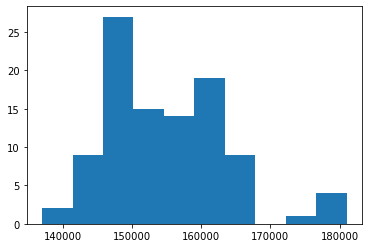

In [66]:
plt.hist(resample_medians)

In [67]:
print(data['SalePrice'].median())
print(raw_sample['SalePrice'].median())

163000.0
154118.5


sklearn resample 활용 알고리즘

In [68]:
from sklearn.utils import resample

In [77]:
def bootstrap_sklearn_median(sample_size, num_of_resample):
    # 재표본추출된 표본집단의 통계량(평균)을 저장할 list
    statistics = [] 
    
    for i in range(0, num_of_resample):
        # 표본으로부터 크기가 sample_size인 resample 추출하여 통계량(mean) 계산
        median = resample(raw_sample, n_samples=sample_size)['SalePrice'].median() 
        statistics.append(median)
    
    return statistics

In [84]:
temp = bootstrap_sklearn_median(100, 100)

(array([ 1., 12., 20., 21., 16., 14.,  9.,  4.,  2.,  1.]),
 array([136730., 141157., 145584., 150011., 154438., 158865., 163292.,
        167719., 172146., 176573., 181000.]),
 <BarContainer object of 10 artists>)

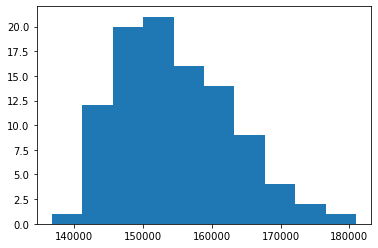

In [85]:
plt.hist(temp)

In [86]:
np.median(temp)

154118.5

In [87]:
np.mean(temp)

154769.24

# 부트스트랩 신뢰구간

- 도수분포표, 히스토그램, 상자그림, 표준오차는 모두 표본추정에서 <b>잠재적인 오차를 이해하는 방법</b>이다.
- 신뢰구간은 이들과 다른 방법

 - 사람들은 불확실함에 반감을 갖는다.
 - 분석가들은 이러한 불확실성을 인정하면서도 점추정치가 제시되면 과도한 믿음을 둔다.
 - 따라서, 단일 수치가 아닌 범위로 추정치를 제시하는 것이 이러한 경향을 막는 방법
 - 신뢰구간은 통계적 샘플링 원칙에 근거한다.

 - 90% 신뢰구간이란
   - 표본통계량의 부트스트랩 표본분포의 90%를 포함하는 구간
   - ex. 부트스트랩 표본통계량 분포의 양끝 5%를 제외한 구간?
 
 - (더 일반적으로) 표본추정치 주위의 x% 신뢰구간이란,
   - 평균적으로 유사한 표본추정치 x% 정도(비슷한 샘플링 절차를 따랐을 때)가 포함되어야 한다.

###### 내가 학부에서 배운 신뢰구간
 - 정의 - 서로 다른 표본에서 계산한 신뢰구간이 n개가 있을 때, 95%는 모평균을 포함한다는 것 (특정 신뢰구간이 모수를 포함할 확률이 95%라는 설명은 틀린 것!) 
 - how to calculate